In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# import scikitplot as skplt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

REPORT:
for C = 1e-5
    Val Accuracy: 0.47 (+/- 0.08)
for C = 1e-3:
    array([0.55866667, 0.55377778, 0.57711111, 0.57622222, 0.56644444])
    Val Accuracy: 0.57 (+/- 0.02)
for C = 1
    array([0.878, 0.87688889, 0.88488889, 0.87244444, 0.88133333])
    Val Accuracy: 0.88 (+/- 0.01)
for C = 5
    array([0.878     , 0.87688889, 0.88488889, 0.87244444, 0.88133333])
    Val Accuracy: 0.88 (+/- 0.01)
for C = 10
    array([0.87888889, 0.884     , 0.89088889, 0.88422222, 0.88333333])
    Val Accuracy: 0.88 (+/- 0.01)
    Test Accuracy: 0.8824

In [2]:
def loadCSV(filename, size):
    n = np.zeros(shape = (size, image_size*image_size))
    nn = np.zeros(shape = (size, 1))
    
    f = open(dest_folder+filename, 'r')
    i = 0
    for x in f:
        lst = x.split(',')
        nn[i] = np.asarray([lst[label]], dtype = np.float32)
        n[i] = np.asarray(lst, dtype=np.float32)[:image_size*image_size]
        i += 1
    for i in range(size):
        for j in range(image_size*image_size):
            n[i][j] /= 255
    return n, nn

In [3]:
dest_folder = './fashion_mnist/'
train_filename = 'train.csv'
test_filename = 'test.csv'
val_filename = 'val.csv'

train_size = 22500
test_size = 5000
val_size = 2501
image_size = 28
label = 784
num_classes = 10

In [4]:
X1, Y1 = loadCSV(train_filename, train_size)
X2, Y2 = loadCSV(test_filename, test_size)
X3, Y3 = loadCSV(val_filename, val_size)

y1 = Y1.reshape(1,train_size)[0]
y2 = Y2.reshape(1,test_size)[0]
y3 = Y3.reshape(1,val_size)[0]

In [15]:
clf = svm.SVC(C = 1e-3, kernel = 'rbf', gamma = 0.05)
scores = cross_val_score(clf, X1, y1, cv=5, n_jobs=-1)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

a = clf.fit(X1,y1)
print(a.score(X2, y2))

0.5736


In [12]:
scores

array([0.87888889, 0.884     , 0.89088889, 0.88422222, 0.88333333])

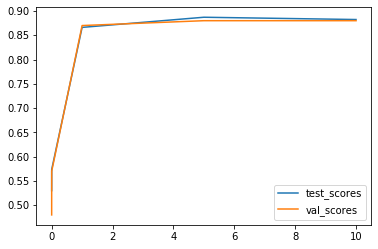

In [16]:
x = np.array([1e-5, 1e-3, 1, 5, 10])
val_scores = np.array([0.48, 0.57, 0.87, 0.88, 0.88])
test_scores = np.array([0.53,0.5736,0.8662,0.8871,0.8824])
from matplotlib import pyplot as plt

plt.plot(x, test_scores, label = 'test_scores')
plt.plot(x, val_scores, label = 'val_scores')
plt.legend()
plt.show()